**Load dataset**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

derm = np.loadtxt("./dermatology2.csv", delimiter=",") #Required deleting the '?' values
print(derm.shape)

# store feature matrix in "X"
X = derm[:,0:33]

# store response vector in "y"
y = derm[:,34]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)




(358, 35)
(286, 33) (286,)
(72, 33) (72,)


**MULTIVARIATE ANALYSIS / GRID SEARCH**


In [18]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_train)

metrics.accuracy_score(y_train, y_pred)


0.9965034965034965

In [19]:
svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_train)

metrics.accuracy_score(y_train, y_pred)

0.9895104895104895

In [20]:
svc = SVC(kernel='poly')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_train)

metrics.accuracy_score(y_train, y_pred)

0.9755244755244755

In [21]:
svc = SVC(kernel='sigmoid')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_train)

metrics.accuracy_score(y_train, y_pred)

0.972027972027972

In [11]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

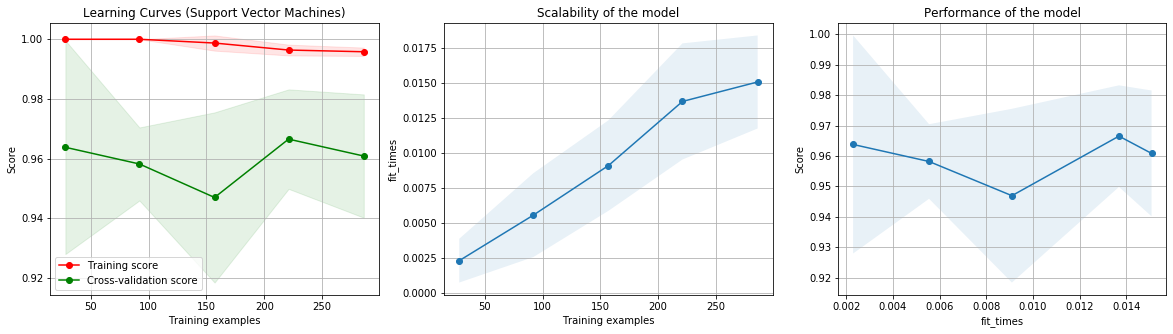

In [17]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

title = "Learning Curves (Support Vector Machines)"
svc = SVC(kernel='linear')
plot_learning_curve(svc, title, X, y, cv=5)

plt.show()

**PREDICT**

In [15]:
# train your model using all data and the best known parameters
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# store the predicted response values
y_pred = svc.predict(X_test)
print(len(y_pred))

# compute classification accuracy for the logistic regression model
print(metrics.accuracy_score(y_test, y_pred))

72
0.9861111111111112
